In [23]:
""" Crop Yield Prediction using Linear Regression """
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
df=pd.read_csv("crop_yield.csv")
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [25]:
# Convert Boolean to numeric
df["Fertilizer_Used"]=df["Fertilizer_Used"].astype(int)

In [26]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,0,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,1,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,0,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,0,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,1,True,Cloudy,110,7.248251


In [27]:
# Features and Target 
X=df[["Rainfall_mm","Temperature_Celsius","Fertilizer_Used"]]
y=df["Yield_tons_per_hectare"]

In [28]:
# Train-Test-Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
# Model
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
# Prediction 
y_pred=model.predict(X_test)

In [35]:
# Evaluation
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

# Print the evaluation
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)

Mean Squared Error: 0.6108276106724929
Mean Absolute Error: 0.6564423220159616
Root Mean Squared Error: 0.7815546114459904
R2 Score: 0.7883101876215737


In [37]:
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient: [0.00499496 0.01992292 1.50137144]
Intercept: 0.6044075698171278


In [32]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000
mean,549.981901,27.504965,0.49994,104.495025,4.649472
std,259.851320,7.220608,0.50000,25.953412,1.696572
min,100.000896,15.000034,0.00000,60.000000,-1.147613
25%,324.891090,21.254502,0.00000,82.000000,3.417637
50%,550.124061,27.507365,0.00000,104.000000,4.651808
75%,774.738520,33.753267,1.00000,127.000000,5.879200
max,999.998098,39.999997,1.00000,149.000000,9.963372


In [33]:
# New Data
new=pd.DataFrame([{
    "Rainfall_mm":845.12,
    "Temperature_Celsius":35.45,
    "Fertilizer_Used":1
}])
result=model.predict(new)
print("Yield in (Tons):",result)

Yield in (Tons): [7.03338775]


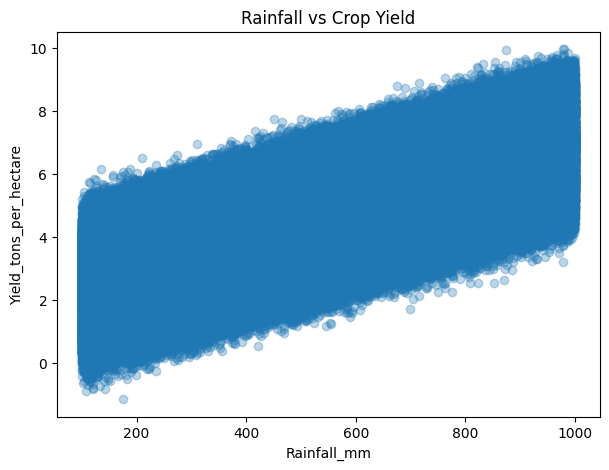

In [47]:
# Rainfall vs Crop Yield

plt.figure(figsize=(7,5))
plt.scatter(df["Rainfall_mm"],df["Yield_tons_per_hectare"],alpha=0.3)
plt.xlabel("Rainfall_mm")
plt.ylabel("Yield_tons_per_hectare")
plt.title("Rainfall vs Crop Yield")
plt.show()

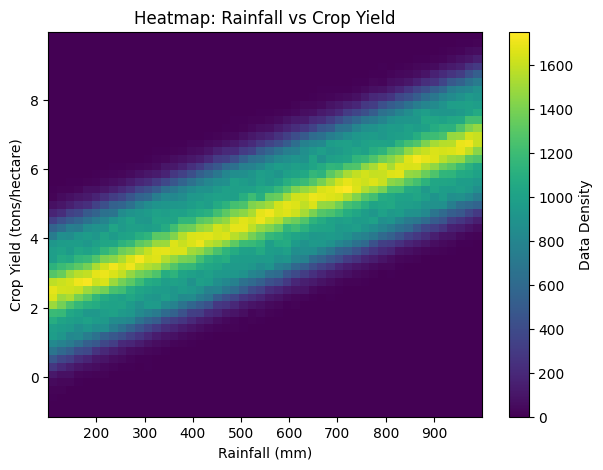

In [49]:
plt.figure(figsize=(7,5))
plt.hist2d(df["Rainfall_mm"],df["Yield_tons_per_hectare"],bins=50)
plt.colorbar(label="Data Density")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Crop Yield (tons/hectare)")
plt.title("Heatmap: Rainfall vs Crop Yield")
plt.show()


<Axes: >

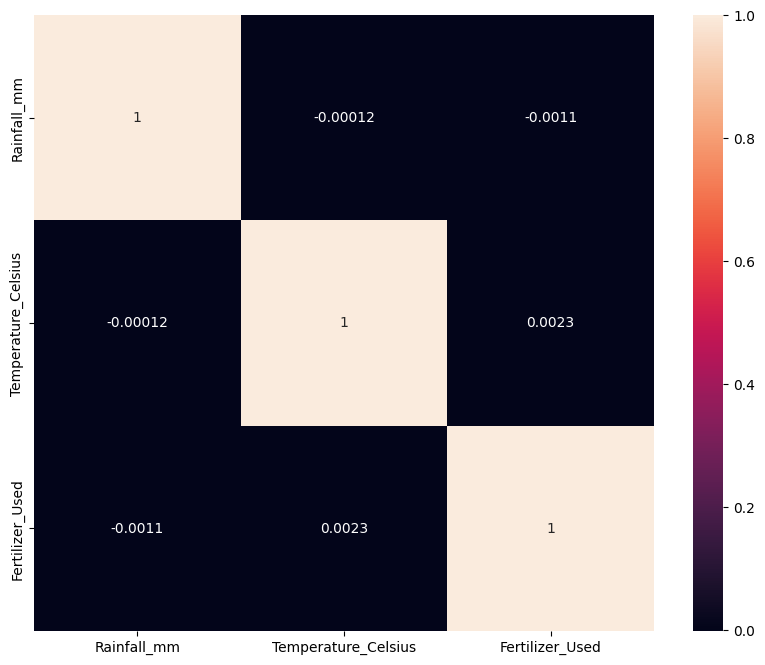

In [52]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),annot=True)

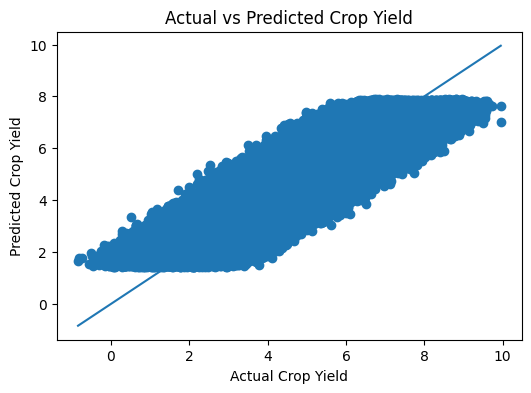

In [41]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()
